In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [2]:
clients_data = pd.read_csv('../input/UCI_Credit_Card.csv',index_col='ID')
clients_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
clients_data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

In [4]:
clients_data = clients_data.replace({'SEX' :[1,2],'MARRIAGE' : [1,2,3,0],'EDUCATION' : [0,1,2,3,4,5,6]},{'SEX' :['Male','Female'], 'MARRIAGE' :['Married','Single','Others','Others'],
                                    'EDUCATION' : ['Unknown','Graduate school','University','High school','Others','Unknown','Unknown']})

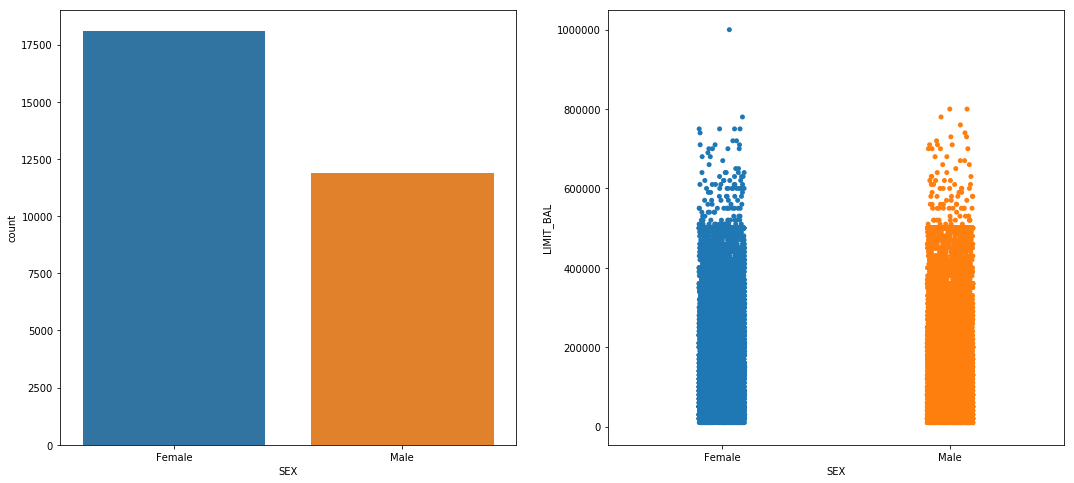

In [5]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(x='SEX',data=clients_data,ax=ax[0])
sns.stripplot(x='SEX',y='LIMIT_BAL',data=clients_data,ax=ax[1])

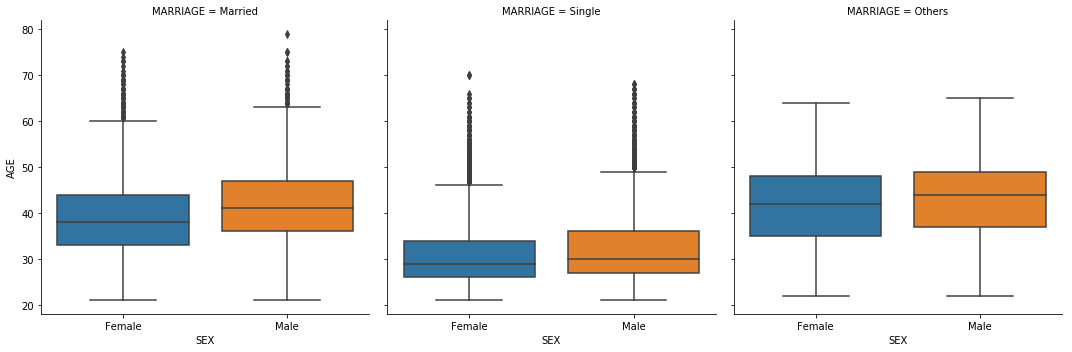

In [6]:
sns.catplot(x='SEX',y='AGE',col='MARRIAGE',data=clients_data,kind='box')

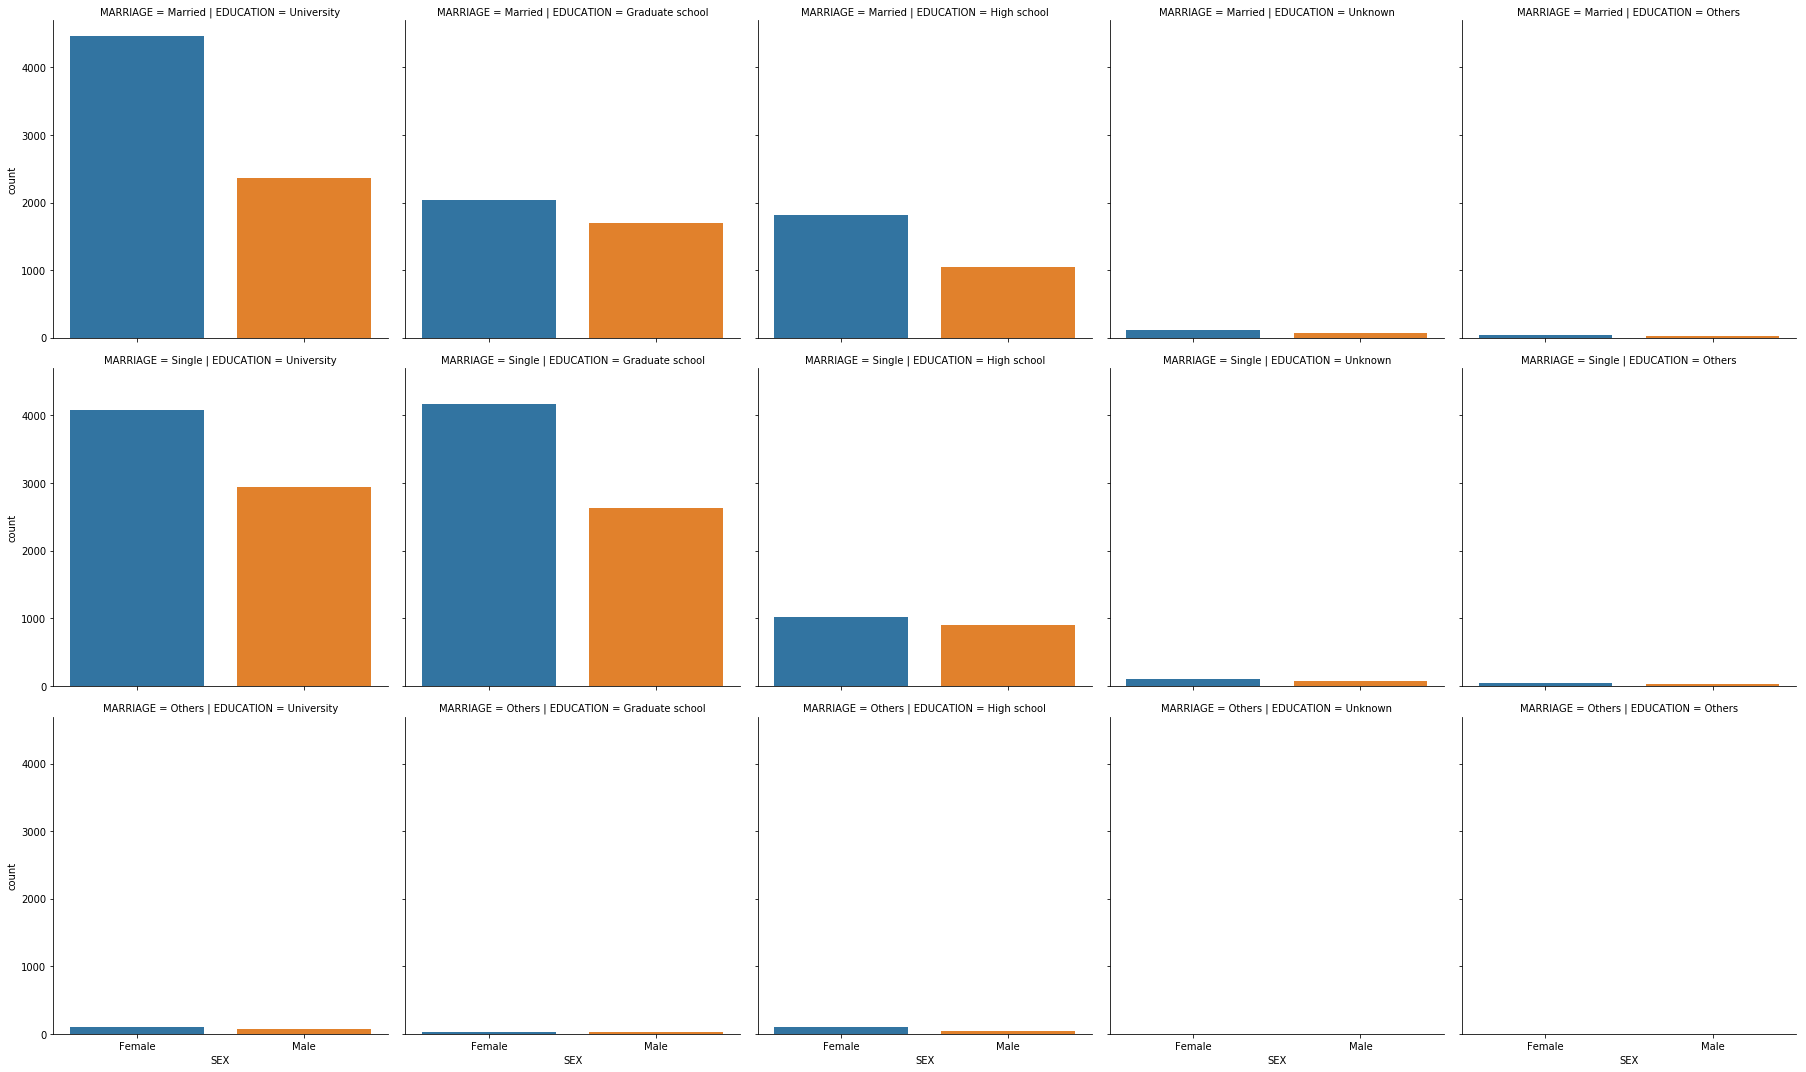

In [7]:
sns.catplot(x='SEX',data=clients_data,kind='count',col='EDUCATION',row='MARRIAGE', aspect=1)

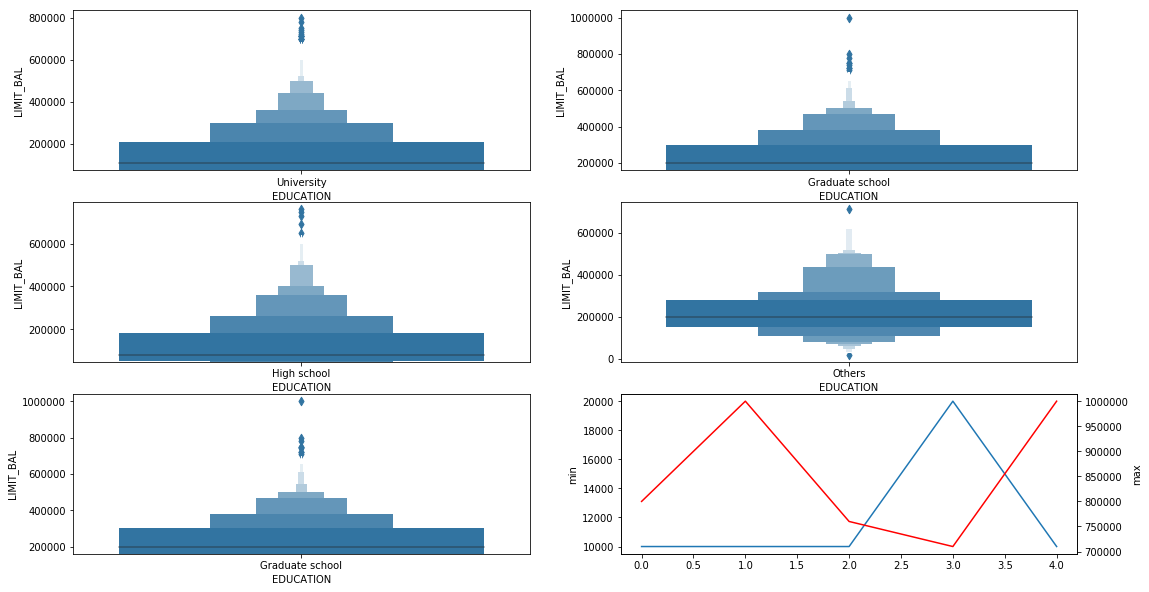

In [8]:
points = np.array([
    [clients_data[clients_data['EDUCATION'] == 'University']['LIMIT_BAL'].max(),
    clients_data[clients_data['EDUCATION'] == 'University']['LIMIT_BAL'].min()],
    [clients_data[clients_data['EDUCATION'] == 'Graduate school']['LIMIT_BAL'].max(),
    clients_data[clients_data['EDUCATION'] == 'Graduate school']['LIMIT_BAL'].min()],
    [clients_data[clients_data['EDUCATION'] == 'High school']['LIMIT_BAL'].max(),
    clients_data[clients_data['EDUCATION'] == 'High school']['LIMIT_BAL'].min()],
    [clients_data[clients_data['EDUCATION'] == 'Others']['LIMIT_BAL'].max(),
    clients_data[clients_data['EDUCATION'] == 'Others']['LIMIT_BAL'].min()],
    [clients_data[clients_data['EDUCATION'] == 'Graduate school']['LIMIT_BAL'].max(),
    clients_data[clients_data['EDUCATION'] == 'Graduate school']['LIMIT_BAL'].min()]
])
#types = ['max','min','max','min','max','min','max','min','max','min']
rate = pd.DataFrame(points,columns=['max','min'])

f,ax = plt.subplots(3,2,figsize=(18,10))
sns.boxenplot(x='EDUCATION',y='LIMIT_BAL',data=clients_data[clients_data['EDUCATION'] == 'University'],ax=ax[0,0])
sns.boxenplot(x='EDUCATION',y='LIMIT_BAL',data=clients_data[clients_data['EDUCATION'] == 'Graduate school'],ax=ax[0,1])
sns.boxenplot(x='EDUCATION',y='LIMIT_BAL',data=clients_data[clients_data['EDUCATION'] == 'High school'],ax=ax[1,0])
sns.boxenplot(x='EDUCATION',y='LIMIT_BAL',data=clients_data[clients_data['EDUCATION'] == 'Others'],ax=ax[1,1])
sns.boxenplot(x='EDUCATION',y='LIMIT_BAL',data=clients_data[clients_data['EDUCATION'] == 'Graduate school'],ax=ax[2,0])
sns.lineplot(x=rate.index,y='min',data=rate,ax=ax[2,1])
ax3 = ax[2,1].twinx()
sns.lineplot(x=rate.index,y='max',data=rate,ax=ax3,color='r')

In [9]:
clients_data['PAY_0'][clients_data['PAY_0'] <= 0] = 0
clients_data['PAY_0'][(clients_data['PAY_0'] > 0) & (clients_data['PAY_0'] <= 3) ] = 1 
clients_data['PAY_0'][clients_data['PAY_0'] > 3 ] = 2

clients_data['PAY_2'][clients_data['PAY_2'] <= 0] = 0
clients_data['PAY_2'][(clients_data['PAY_2'] > 0) & (clients_data['PAY_2'] <= 3) ] = 1 
clients_data['PAY_2'][clients_data['PAY_2'] > 3 ] = 2

clients_data['PAY_3'][clients_data['PAY_3'] <= 0] = 0
clients_data['PAY_3'][(clients_data['PAY_3'] > 0) & (clients_data['PAY_3'] <= 3) ] = 1 
clients_data['PAY_3'][clients_data['PAY_3'] > 3 ] = 2

clients_data['PAY_4'][clients_data['PAY_4'] <= 0] = 0
clients_data['PAY_4'][(clients_data['PAY_4'] > 0) & (clients_data['PAY_4'] <= 3) ] = 1 
clients_data['PAY_4'][clients_data['PAY_4'] > 3 ] = 2

clients_data['PAY_5'][clients_data['PAY_5'] <= 0] = 0
clients_data['PAY_5'][(clients_data['PAY_5'] > 0) & (clients_data['PAY_5'] <= 3) ] = 1 
clients_data['PAY_5'][clients_data['PAY_5'] > 3 ] = 2

clients_data['PAY_6'][clients_data['PAY_6'] <= 0] = 0
clients_data['PAY_6'][(clients_data['PAY_6'] > 0) & (clients_data['PAY_6'] <= 3)] = 1 
clients_data['PAY_6'][clients_data['PAY_6'] > 3 ] = 2

clients_data = clients_data.replace({'PAY_0' : [0,1,2],'PAY_2' : [0,1,2],'PAY_3' : [0,1,2],
                                     'PAY_4' : [0,1,2],'PAY_5' : [0,1,2],'PAY_6' : [0,1,2]},
                                     {'PAY_0' : ['Early','On time','Late'],'PAY_2' : ['Early','On time','Late'],
                                      'PAY_3' : ['Early','On time','Late'],'PAY_4' : ['Early','On time','Late'],
                                      'PAY_5' : ['Early','On time','Late'],'PAY_6' : ['Early','On time','Late']})
clients_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,On time,On time,Early,Early,Early,Early,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,Female,University,Single,26,Early,On time,Early,Early,Early,On time,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,Female,University,Single,34,Early,Early,Early,Early,Early,Early,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,Female,University,Married,37,Early,Early,Early,Early,Early,Early,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,Male,University,Married,57,Early,Early,Early,Early,Early,Early,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


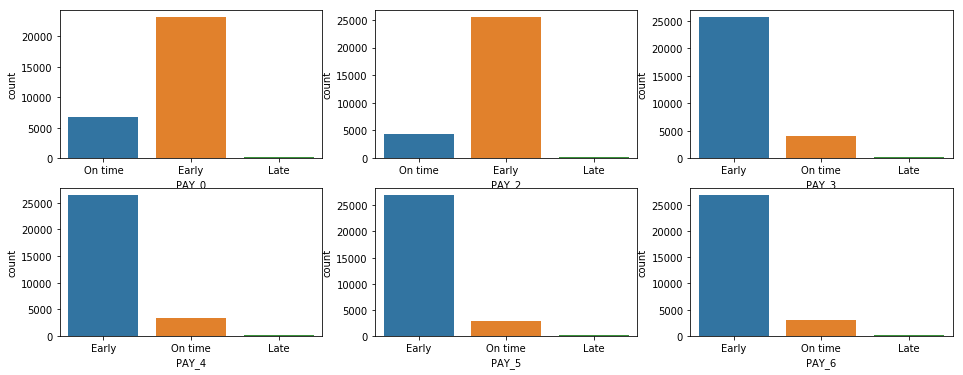

In [10]:
f,ax= plt.subplots(2,3,figsize=(16,6))
sns.countplot(x='PAY_0',data=clients_data,ax=ax[0,0])
sns.countplot(x='PAY_2',data=clients_data,ax=ax[0,1])
sns.countplot(x='PAY_3',data=clients_data,ax=ax[0,2])
sns.countplot(x='PAY_4',data=clients_data,ax=ax[1,0])
sns.countplot(x='PAY_5',data=clients_data,ax=ax[1,1])
sns.countplot(x='PAY_6',data=clients_data,ax=ax[1,2])

In [11]:
clients_data['TOTAL_BILL'] = [value.sum() for value in clients_data.iloc[:,11:17].values]
clients_data = clients_data.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)
clients_data['TOTAL_PAY_AMT'] = [value.sum() for value in clients_data.iloc[:,11:17].values]
clients_data = clients_data.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1)
clients_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,target,TOTAL_BILL,TOTAL_PAY_AMT
ID,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,On time,On time,Early,Early,Early,Early,1,7704.0,689.0
2,120000.0,Female,University,Single,26,Early,On time,Early,Early,Early,On time,1,17077.0,5000.0
3,90000.0,Female,University,Single,34,Early,Early,Early,Early,Early,Early,0,101653.0,11018.0
4,50000.0,Female,University,Married,37,Early,Early,Early,Early,Early,Early,0,231334.0,8388.0
5,50000.0,Male,University,Married,57,Early,Early,Early,Early,Early,Early,0,109339.0,59049.0


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clients_data['SEX'] = le.fit_transform(clients_data['SEX'])
educations = pd.get_dummies(clients_data['EDUCATION'])
marriages = pd.get_dummies(clients_data['MARRIAGE'])
pay_0 = pd.get_dummies(clients_data['PAY_0'],prefix='PAY_0')
pay_2 = pd.get_dummies(clients_data['PAY_2'],prefix='PAY_2')
pay_3 = pd.get_dummies(clients_data['PAY_3'],prefix='PAY_3')
pay_4 = pd.get_dummies(clients_data['PAY_4'],prefix='PAY_4')
pay_5 = pd.get_dummies(clients_data['PAY_5'],prefix='PAY_5')
pay_6 = pd.get_dummies(clients_data['PAY_6'],prefix='PAY_6')
clients_data = pd.concat([clients_data,educations],axis=1)
clients_data = pd.concat([clients_data,marriages],axis=1)
clients_data = pd.concat([clients_data,pay_0],axis=1)
clients_data = pd.concat([clients_data,pay_2],axis=1)
clients_data = pd.concat([clients_data,pay_3],axis=1)
clients_data = pd.concat([clients_data,pay_4],axis=1)
clients_data = pd.concat([clients_data,pay_5],axis=1)
clients_data = pd.concat([clients_data,pay_6],axis=1)
clients_data = clients_data.drop(['EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
clients_data.head()

,LIMIT_BAL,SEX,AGE,target,TOTAL_BILL,TOTAL_PAY_AMT,Graduate school,High school,Others,University,Unknown,Married,Others,Single,PAY_0_Early,PAY_0_Late,PAY_0_On time,PAY_2_Early,PAY_2_Late,PAY_2_On time,PAY_3_Early,PAY_3_Late,PAY_3_On time,PAY_4_Early,PAY_4_Late,PAY_4_On time,PAY_5_Early,PAY_5_Late,PAY_5_On time,PAY_6_Early,PAY_6_Late,PAY_6_On time
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,0,24,1,7704.0,689.0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,120000.0,0,26,1,17077.0,5000.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
3,90000.0,0,34,0,101653.0,11018.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,50000.0,0,37,0,231334.0,8388.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,50000.0,1,57,0,109339.0,59049.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.metrics import davies_bouldin_score

In [14]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(clients_data)

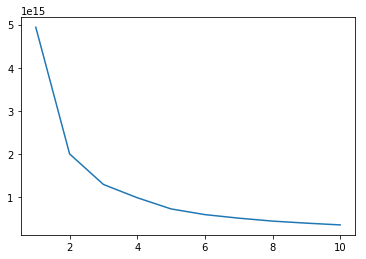

In [15]:
wcss = []
for i in range(1,11):
    k_mean = KMeans(n_clusters=i, init='k-means++',random_state=0)
    k_mean.fit(X_pca)
    wcss.append(k_mean.inertia_)

sns.lineplot(x=range(1,11),y=wcss)

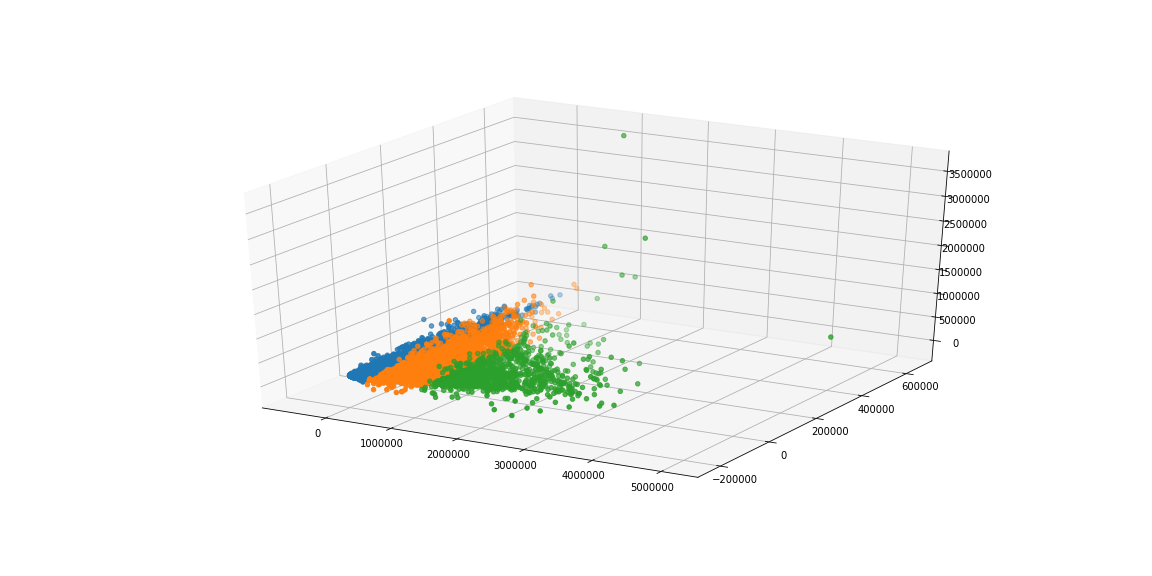

In [16]:
k_mean = KMeans(n_clusters=3,init='k-means++')
k_mean.fit(X_pca)
k_mean_predict = k_mean.predict(X_pca)
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.scatter(X_pca[k_mean_predict == 0,0],X_pca[k_mean_predict == 0,1],X_pca[k_mean_predict == 0,2], 'blue')
ax.scatter(X_pca[k_mean_predict == 1,0],X_pca[k_mean_predict == 1,1],X_pca[k_mean_predict == 1,2], 'red')
ax.scatter(X_pca[k_mean_predict == 2,0],X_pca[k_mean_predict == 2,1],X_pca[k_mean_predict == 2,2], 'green')

In [17]:
dbs = davies_bouldin_score(X_pca,k_mean.labels_)
print(dbs)

0.6703766816968096
